In [1]:
import pandas as pd
#from pathlib import Path
import numpy as np

In [2]:
doge_df = pd.read_csv("./Resources/DOGEUSD_prophet_returns.csv", parse_dates = True, infer_datetime_format = True)

In [3]:
doge_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week
0,9-Nov-17,0.001207,0.001415,0.001181,0.001415,0.001415,"6,259,550",5
1,10-Nov-17,0.001421,0.001431,0.001125,0.001163,0.001163,"4,246,520",6
2,11-Nov-17,0.001146,0.001257,0.001141,0.001201,0.001201,"2,231,080",7
3,12-Nov-17,0.001189,0.001210,0.001002,0.001038,0.001038,"3,288,960",1
4,13-Nov-17,0.001046,0.001212,0.001019,0.001211,0.001211,"2,481,270",2
5,14-Nov-17,0.001201,0.001239,0.001131,0.001184,0.001184,"2,660,340",3
6,15-Nov-17,0.001189,0.001351,0.001179,0.001339,0.001339,"2,840,180",4
7,16-Nov-17,0.001348,0.001424,0.001286,0.001390,0.001390,"3,423,010",5
8,17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6
9,18-Nov-17,0.001308,0.001385,0.001254,0.001373,0.001373,"1,648,260",7


In [4]:
doge_df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Adj Close          float64
Volume              object
Day_of_The_Week      int64
dtype: object

In [5]:
doge_df["Day_of_The_Week_Shifted_3"] = doge_df["Day_of_The_Week"].shift(3)
doge_df["Close_Shifted_3"] = doge_df["Close"].shift(3)

In [6]:
doge_df.head(15)
#Buy on Tuesday (3) and sell on Friday (6), day of the week values generated with Excel's weekday function
#First Tuesday in the set is 11/14/2017 (DOTW = 3), Friday after is 11/17/2017 (DOTW = 6)
#Shifting dataset by 3 and taking a slice of the data where DOTW = 6 lines up these values so the weekly ROR can simply be calculated with ["Close"]/["Close_Shifted_3"]

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3
0,9-Nov-17,0.001207,0.001415,0.001181,0.001415,0.001415,"6,259,550",5,NaN,NaN
1,10-Nov-17,0.001421,0.001431,0.001125,0.001163,0.001163,"4,246,520",6,NaN,NaN
2,11-Nov-17,0.001146,0.001257,0.001141,0.001201,0.001201,"2,231,080",7,NaN,NaN
3,12-Nov-17,0.001189,0.001210,0.001002,0.001038,0.001038,"3,288,960",1,5.0,0.001415
4,13-Nov-17,0.001046,0.001212,0.001019,0.001211,0.001211,"2,481,270",2,6.0,0.001163
5,14-Nov-17,0.001201,0.001239,0.001131,0.001184,0.001184,"2,660,340",3,7.0,0.001201
6,15-Nov-17,0.001189,0.001351,0.001179,0.001339,0.001339,"2,840,180",4,1.0,0.001038
7,16-Nov-17,0.001348,0.001424,0.001286,0.001390,0.001390,"3,423,010",5,2.0,0.001211
8,17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6,3.0,0.001184
9,18-Nov-17,0.001308,0.001385,0.001254,0.001373,0.001373,"1,648,260",7,4.0,0.001339


In [7]:
# make sure no dates are missing, count of second function should be 1 minus count of first function (as the second day in the dataset is a Friday, so there's no Tuesday pair for this value)

# Number of Fridays in the dataset
print(len(doge_df.loc[doge_df["Day_of_The_Week"] == 6]))

# Number of shifted values with Tuesday/Friday pairs in the dataset
print(len(doge_df.loc[(doge_df["Day_of_The_Week"] == 3) & (doge_df["Day_of_The_Week_Shifted_3"] == 6)]))

#values check out using the static file included in the dataset

256
0


In [8]:
# removing values not needed for calculation: 

doge_df_ror = doge_df.loc[doge_df["Day_of_The_Week"] == 6].copy()
doge_df_ror = doge_df_ror.dropna()
display(doge_df_ror.head())
display(doge_df_ror.tail())

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3
8,17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6,3.0,0.001184
15,24-Nov-17,0.001940,0.001978,0.001788,0.001908,0.001908,"9,585,960",6,3.0,0.001389
22,1-Dec-17,0.002051,0.002237,0.001971,0.002148,0.002148,"5,258,110",6,3.0,0.002363
29,8-Dec-17,0.002730,0.002846,0.002326,0.002779,0.002779,"11,797,600",6,3.0,0.002479
36,15-Dec-17,0.003670,0.003809,0.003483,0.003762,0.003762,"19,043,800",6,3.0,0.003304


,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3
1758,2-Sep-22,0.062372,0.062712,0.060947,0.061635,0.061635,"273,453,013",6,3.0,0.061525
1765,9-Sep-22,0.060974,0.064622,0.060934,0.064018,0.064018,"487,988,732",6,3.0,0.058983
1772,16-Sep-22,0.058792,0.060423,0.058453,0.060423,0.060423,"247,011,315",6,3.0,0.060129
1779,23-Sep-22,0.059593,0.064032,0.059565,0.063336,0.063336,"704,823,247",6,3.0,0.058417
1786,30-Sep-22,0.060738,0.062040,0.059958,0.061653,0.061653,"369,084,722",6,3.0,0.060609


In [9]:
doge_df_ror["pct_change"] = doge_df_ror["Close"]/doge_df_ror["Close_Shifted_3"]
doge_df_ror.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3,pct_change
8,17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6,3.0,0.001184,1.108953
15,24-Nov-17,0.001940,0.001978,0.001788,0.001908,0.001908,"9,585,960",6,3.0,0.001389,1.373650
22,1-Dec-17,0.002051,0.002237,0.001971,0.002148,0.002148,"5,258,110",6,3.0,0.002363,0.909014
29,8-Dec-17,0.002730,0.002846,0.002326,0.002779,0.002779,"11,797,600",6,3.0,0.002479,1.121017
36,15-Dec-17,0.003670,0.003809,0.003483,0.003762,0.003762,"19,043,800",6,3.0,0.003304,1.138620


In [10]:
doge_df_ror.sort_values(by="Date", ascending = True)
doge_df_ror["cum_pct_change"] = doge_df_ror["pct_change"].cumprod()
doge_df_ror["cum_pct_change"] = doge_df_ror["cum_pct_change"]*100 - 100
doge_df_ror.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3,pct_change,cum_pct_change
8,17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6,3.0,0.001184,1.108953,10.895270
15,24-Nov-17,0.001940,0.001978,0.001788,0.001908,0.001908,"9,585,960",6,3.0,0.001389,1.373650,52.331300
22,1-Dec-17,0.002051,0.002237,0.001971,0.002148,0.002148,"5,258,110",6,3.0,0.002363,0.909014,38.471279
29,8-Dec-17,0.002730,0.002846,0.002326,0.002779,0.002779,"11,797,600",6,3.0,0.002479,1.121017,55.228594
36,15-Dec-17,0.003670,0.003809,0.003483,0.003762,0.003762,"19,043,800",6,3.0,0.003304,1.138620,76.746359


In [11]:
doge_df_ror.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3,pct_change,cum_pct_change
1758,2-Sep-22,0.062372,0.062712,0.060947,0.061635,0.061635,"273,453,013",6,3.0,0.061525,1.001788,3971.879842
1765,9-Sep-22,0.060974,0.064622,0.060934,0.064018,0.064018,"487,988,732",6,3.0,0.058983,1.085364,4319.470080
1772,16-Sep-22,0.058792,0.060423,0.058453,0.060423,0.060423,"247,011,315",6,3.0,0.060129,1.004889,4341.079024
1779,23-Sep-22,0.059593,0.064032,0.059565,0.063336,0.063336,"704,823,247",6,3.0,0.058417,1.084205,4715.039819
1786,30-Sep-22,0.060738,0.062040,0.059958,0.061653,0.061653,"369,084,722",6,3.0,0.060609,1.017225,4797.979672


<AxesSubplot:title={'center':'DogeCoin Trading Model - Buy on Tuesday, Sell on Friday - Inspired by FbProphet Seasonality Modeling'}, xlabel='Date', ylabel='% Rate of Return'>

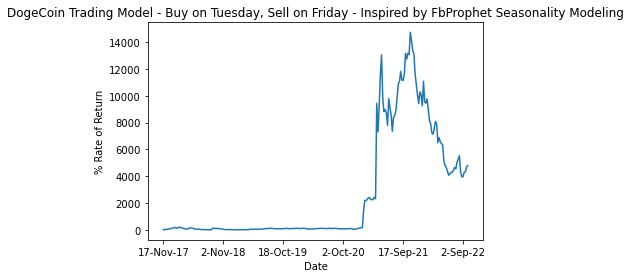

In [12]:
%matplotlib inline
doge_df_ror = doge_df_ror.set_index("Date")
doge_df_ror["cum_pct_change"].plot(title="DogeCoin Trading Model - Buy on Tuesday, Sell on Friday - Inspired by FbProphet Seasonality Modeling", ylabel = "% Rate of Return")

In [13]:
doge_df_ror["value_of_1000_iv"] = (doge_df_ror["cum_pct_change"]/100+1)*1000

In [14]:
doge_df_ror.head()

,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3,pct_change,cum_pct_change,value_of_1000_iv
Date,,,,,,,,,,,,
17-Nov-17,0.001381,0.001394,0.001274,0.001313,0.001313,"2,787,480",6,3.0,0.001184,1.108953,10.895270,1108.952703
24-Nov-17,0.001940,0.001978,0.001788,0.001908,0.001908,"9,585,960",6,3.0,0.001389,1.373650,52.331300,1523.313000
1-Dec-17,0.002051,0.002237,0.001971,0.002148,0.002148,"5,258,110",6,3.0,0.002363,0.909014,38.471279,1384.712790
8-Dec-17,0.002730,0.002846,0.002326,0.002779,0.002779,"11,797,600",6,3.0,0.002479,1.121017,55.228594,1552.285940
15-Dec-17,0.003670,0.003809,0.003483,0.003762,0.003762,"19,043,800",6,3.0,0.003304,1.138620,76.746359,1767.463591


In [15]:
doge_df_ror.tail()

,Open,High,Low,Close,Adj Close,Volume,Day_of_The_Week,Day_of_The_Week_Shifted_3,Close_Shifted_3,pct_change,cum_pct_change,value_of_1000_iv
Date,,,,,,,,,,,,
2-Sep-22,0.062372,0.062712,0.060947,0.061635,0.061635,"273,453,013",6,3.0,0.061525,1.001788,3971.879842,40718.798423
9-Sep-22,0.060974,0.064622,0.060934,0.064018,0.064018,"487,988,732",6,3.0,0.058983,1.085364,4319.470080,44194.700803
16-Sep-22,0.058792,0.060423,0.058453,0.060423,0.060423,"247,011,315",6,3.0,0.060129,1.004889,4341.079024,44410.790244
23-Sep-22,0.059593,0.064032,0.059565,0.063336,0.063336,"704,823,247",6,3.0,0.058417,1.084205,4715.039819,48150.398187
30-Sep-22,0.060738,0.062040,0.059958,0.061653,0.061653,"369,084,722",6,3.0,0.060609,1.017225,4797.979672,48979.796721


<AxesSubplot:title={'center':"DogeCoin Trading Model - Buy on Tuesday, Sell on Friday - Inspired by FbProphet Seasonality Modeling - Value of a $1000 Initial Investment Traded Throughout Dogecoin's Historical Data"}, xlabel='Date', ylabel='$ USD'>

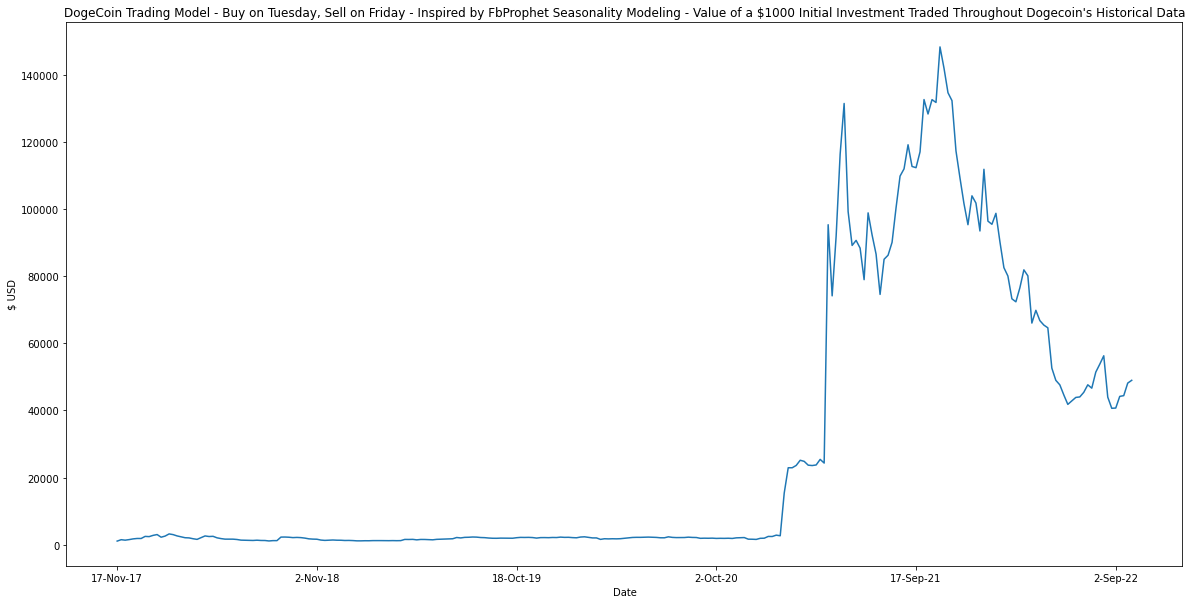

In [39]:
%matplotlib inline
#doge_df_ror = doge_df_ror.set_index("Date")
doge_df_ror["value_of_1000_iv"].plot(title="DogeCoin Trading Model - Buy on Tuesday, Sell on Friday - Inspired by FbProphet Seasonality Modeling - Value of a $1000 Initial Investment Traded Throughout Dogecoin's Historical Data", ylabel = "$ USD", figsize = (20, 10))

In [32]:
final_for_1000_iv = doge_df_ror["value_of_1000_iv"].iloc[-1]

In [35]:
print(f"If $1000 were traded in and out of Dogecoin, buying on Tuesday with these prices and selling on Friday with these prices, an initial investment of $1000 could have turned in to ${final_for_1000_iv: 0.0f}")

If $1000 were traded in and out of Dogecoin, buying on Tuesday with these prices and selling on Friday with these prices, an initial investment of $1000 could have turned in to $ 48980
